# --------------------------
# Instalação de Dependências
# --------------------------

In [2]:
!git clone https://github.com/eduardobatista/ActVibModules.git

%pip install matplotlib
%pip install numpy
%pip install scikit-learn
%pip install scipy
%pip install pyarrow

fatal: destination path 'ActVibModules' already exists and is not an empty directory.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# ------------------
# Importações
# ------------------

In [3]:
import os
import gdown
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
from ActVibModules.ActVibSystem import ActVibData 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -------------------
# Configuração de Path
# -------------------

In [4]:
os.getcwd()

'c:\\Users\\jpsfb\\OneDrive\\Área de Trabalho\\LINSE\\Códigos'

# -----------------------------------
# Download e Leitura dos Dados
# -----------------------------------

In [5]:
# Lista de tuplas contendo o ID do arquivo e o URL de cada arquivo
arquivos_para_baixar = [
    ('ChaveGrande.feather', 'https://drive.google.com/file/d/1xK_qz5l0gtrXJIHpcM4AecEdMN8iZSlj/view?usp=drive_link'),
    ('ChaveMedia.feather', 'https://drive.google.com/file/d/1pBfJGCQ6T_lDd7kg816Jy6L6hMSxH2kD/view?usp=drive_link'),
    ('ChavePequena.feather', 'https://drive.google.com/file/d/1LRB3S8W0m-H_Pd07Pm4Id7jftuLeh3WK/view?usp=drive_link'),
    ('Impacto_Chave_Pequena-9.feather', 'https://drive.google.com/file/d/1phWJSmgjuD6rPUYVk0vtXcjtqmkg4EQc/view?usp=drive_link'),
    ('Impacto_Chave_Media-13.feather', 'https://drive.google.com/file/d/1Eswo4DU99iIiwd6AQGjMRE_jEkDZBl7V/view?usp=drive_link'),
    ('Impacto_Chave_Grande-22.feather', 'https://drive.google.com/file/d/11aU6OfOFt1QV7xhyynyC-gg1Jbnhg9nT/view?usp=drive_link')
]

# Itera sobre cada tupla e baixa o arquivo correspondente
for arquivo_id, arquivo_url in arquivos_para_baixar:
    # Baixando o arquivo
    gdown.download(arquivo_url, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1xK_qz5l0gtrXJIHpcM4AecEdMN8iZSlj
To: c:\Users\jpsfb\OneDrive\Área de Trabalho\LINSE\Códigos\ChaveGrande.feather
100%|██████████| 6.44M/6.44M [00:00<00:00, 12.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pBfJGCQ6T_lDd7kg816Jy6L6hMSxH2kD
To: c:\Users\jpsfb\OneDrive\Área de Trabalho\LINSE\Códigos\ChaveMedia.feather
100%|██████████| 6.30M/6.30M [00:00<00:00, 12.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LRB3S8W0m-H_Pd07Pm4Id7jftuLeh3WK
To: c:\Users\jpsfb\OneDrive\Área de Trabalho\LINSE\Códigos\ChavePequena.feather
100%|██████████| 6.24M/6.24M [00:00<00:00, 12.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1phWJSmgjuD6rPUYVk0vtXcjtqmkg4EQc
To: c:\Users\jpsfb\OneDrive\Área de Trabalho\LINSE\Códigos\Impacto_Chave_Pequena-9.feather
100%|██████████| 6.33M/6.33M [00:00<00:00, 12.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Eswo4DU99iIiwd6AQGjMRE_jEkDZBl7V
To: c:\Users\jpsfb\OneDrive\Ár

# ------------------------
# Leitura dos Dados
# ------------------------

In [6]:
dadosChaveGrande = ActVibData("ChaveGrande.feather")
dadosChaveMedia = ActVibData("ChaveMedia.feather")
dadosChavePequena = ActVibData("ChavePequena.feather")
dadosImpactoChavePequena = ActVibData("Impacto_Chave_Pequena-9.feather")
dadosImpactoChaveMedia = ActVibData("Impacto_Chave_Media-13.feather")
dadosImpactoChaveGrande = ActVibData("Impacto_Chave_Grande-22.feather")

# --------------------------
# Exibição dos Dados
# --------------------------

In [7]:
display(dadosChaveGrande.head())
display(dadosChaveMedia.head())
display(dadosChavePequena.head())
display(dadosImpactoChavePequena.head())
display(dadosImpactoChaveMedia.head())
display(dadosImpactoChaveGrande.head())

,time,dac1,dac2,dac3,dac4,imu1accx,imu1accy,imu1accz,imu1gyrox,imu1gyroy,imu1gyroz,imu2accx,imu2accy,imu2accz,imu2gyrox,imu2gyroy,imu2gyroz,log
0,0.000000,0.0,0.0,0.0,0.0,-1.575385,19.460071,0.745794,2.128601,-4.177094,-3.849030,-1.935712,19.340361,0.954089,2.231598,-6.542206,-2.532959,Started
1,0.004808,0.0,0.0,0.0,0.0,-1.641225,19.482816,0.681150,2.132416,-4.055023,-3.688812,-1.953669,19.331981,0.908600,2.174377,-6.782532,-2.552032,"IMU1|LSM6DS3|0x6B|I2C-1|±4g (±39,2m/s²)|±125º/..."
2,0.009616,0.0,0.0,0.0,0.0,-1.600524,19.462465,0.713472,1.892090,-3.791809,-3.479004,-1.966837,19.325996,0.997185,2.197266,-6.752014,-2.548218,"IMU2|LSM6DS3|0x6B|I2C-2|±4g (±39,2m/s²)|±125º/..."
3,0.014424,0.0,0.0,0.0,0.0,-1.600524,19.464859,0.721852,1.930237,-4.016876,-3.692627,-1.952471,19.359515,0.964863,2.162933,-6.469727,-2.388000,IMU3|Disabled
4,0.019232,0.0,0.0,0.0,0.0,-1.619677,19.481619,0.720655,2.086639,-4.203796,-3.692627,-1.948880,19.315222,0.938527,2.193451,-6.687164,-2.567291,ADC|ADS1015|0|0|0|0|±0.256 V|1600 SPS


,time,dac1,dac2,dac3,dac4,imu1accx,imu1accy,imu1accz,imu1gyrox,imu1gyroy,imu1gyroz,imu2accx,imu2accy,imu2accz,imu2gyrox,imu2gyroy,imu2gyroz,log
0,0.000000,0.0,0.0,0.0,0.0,-1.375469,19.500773,0.654814,2.109528,-4.230499,-3.898621,-1.808819,19.311631,0.926556,2.532959,-6.546021,-2.574921,Started
1,0.004808,0.0,0.0,0.0,0.0,-1.377863,19.509152,0.700304,2.033234,-4.051208,-3.818512,-1.857900,19.375077,0.948104,2.475739,-6.916046,-2.571106,"IMU1|LSM6DS3|0x6B|I2C-1|±4g (±39,2m/s²)|±125º/..."
2,0.009616,0.0,0.0,0.0,0.0,-1.399411,19.505561,0.671574,2.052307,-3.871918,-3.665924,-1.812411,19.349938,0.893037,2.388000,-6.713867,-2.487183,"IMU2|LSM6DS3|0x6B|I2C-2|±4g (±39,2m/s²)|±125º/..."
3,0.014424,0.0,0.0,0.0,0.0,-1.383849,19.507955,0.697910,2.086639,-4.138947,-4.001617,-1.869871,19.376274,0.997185,2.445221,-6.381989,-2.437592,IMU3|Disabled
4,0.019232,0.0,0.0,0.0,0.0,-1.405396,19.501970,0.669179,2.140045,-4.119873,-3.932953,-1.831564,19.346347,0.901417,2.380371,-6.710052,-2.544403,ADC|ADS1015|0|0|0|0|±0.256 V|1600 SPS


,time,dac1,dac2,dac3,dac4,imu1accx,imu1accy,imu1accz,imu1gyrox,imu1gyroy,imu1gyroz,imu2accx,imu2accy,imu2accz,imu2gyrox,imu2gyroy,imu2gyroz,log
0,0.000000,0.0,0.0,0.0,0.0,-1.227028,19.512744,0.902614,4.207611,-3.482819,-3.627777,-1.744176,19.413384,2.187103,6.031036,-6.065369,-2.548218,Started
1,0.004808,0.0,0.0,0.0,0.0,-1.352724,19.554642,0.907402,4.127502,-3.883362,-3.787994,-1.997961,19.341558,2.438494,5.664825,-6.122589,-2.513885,"IMU1|LSM6DS3|0x6B|I2C-1|±4g (±39,2m/s²)|±125º/..."
2,0.009616,0.0,0.0,0.0,0.0,-1.247379,19.515138,1.365892,3.791809,-3.837585,-3.932953,-1.666364,19.487604,2.841917,5.054474,-6.534576,-2.647400,"IMU2|LSM6DS3|0x6B|I2C-2|±4g (±39,2m/s²)|±125º/..."
3,0.014424,0.0,0.0,0.0,0.0,-1.382651,19.577387,1.188721,3.070831,-3.421783,-3.566742,-2.051831,19.261352,2.561796,4.379272,-6.542206,-2.536774,IMU3|Disabled
4,0.019232,0.0,0.0,0.0,0.0,-1.212663,19.509152,1.379060,2.571106,-3.768921,-3.715515,-1.601721,19.529503,3.378219,3.993988,-6.107330,-2.449036,ADC|ADS1015|0|0|0|0|±0.256 V|1600 SPS


,time,dac1,dac2,dac3,dac4,imu1accx,imu1accy,imu1accz,imu1gyrox,imu1gyroy,imu1gyroz,imu2accx,imu2accy,imu2accz,imu2gyrox,imu2gyroy,imu2gyroz,log
0,0.000000,0.0,0.0,0.0,0.0,-1.641225,19.519926,0.623690,3.360748,-4.749298,-3.952026,-2.233790,19.297265,0.980426,2.887726,-7.152557,-2.746582,Started
1,0.004808,0.0,0.0,0.0,0.0,-1.653196,19.522320,0.701501,3.078461,-4.554749,-3.643036,-2.224213,19.324799,1.043872,2.765656,-7.270813,-2.799988,"IMU1|LSM6DS3|0x6B|I2C-1|±4g (±39,2m/s²)|±125º/..."
2,0.009616,0.0,0.0,0.0,0.0,-1.662773,19.506758,0.640449,3.215790,-4.337311,-3.669739,-2.269703,19.280506,0.997185,2.830505,-6.938934,-2.796173,"IMU2|LSM6DS3|0x6B|I2C-2|±4g (±39,2m/s²)|±125º/..."
3,0.014424,0.0,0.0,0.0,0.0,-1.628057,19.519926,0.635661,3.314972,-4.661560,-3.818512,-2.219425,19.327193,1.098939,2.788544,-6.946564,-2.861023,IMU3|Disabled
4,0.019232,0.0,0.0,0.0,0.0,-1.659182,19.533094,0.677559,3.387451,-4.615784,-3.833771,-2.207454,19.292477,0.998382,2.727509,-7.362366,-2.872467,ADC|ADS1015|0|0|0|0|±0.256 V|1600 SPS


,time,dac1,dac2,dac3,dac4,imu1accx,imu1accy,imu1accz,imu1gyrox,imu1gyroy,imu1gyroz,imu2accx,imu2accy,imu2accz,imu2gyrox,imu2gyroy,imu2gyroz,log
0,0.000000,0.0,0.0,0.0,0.0,-1.886631,19.486407,0.562637,2.513885,-4.337311,-3.372192,-2.352303,19.244593,0.836773,2.555847,-7.061005,-2.742767,Started
1,0.004808,0.0,0.0,0.0,0.0,-1.843535,19.482816,0.622492,2.647400,-4.432678,-3.471375,-2.266112,19.302054,0.956484,2.738953,-6.820679,-2.704620,"IMU1|LSM6DS3|0x6B|I2C-1|±4g (±39,2m/s²)|±125º/..."
2,0.009616,0.0,0.0,0.0,0.0,-1.853112,19.468451,0.611719,2.681732,-4.543304,-3.524780,-2.264915,19.288886,0.932542,2.815247,-7.339478,-2.784729,"IMU2|LSM6DS3|0x6B|I2C-2|±4g (±39,2m/s²)|±125º/..."
3,0.014424,0.0,0.0,0.0,0.0,-1.829170,19.473239,0.566229,2.750397,-4.528046,-3.364563,-2.269703,19.311631,0.907402,2.685547,-7.404327,-2.780914,IMU3|Disabled
4,0.019232,0.0,0.0,0.0,0.0,-1.825579,19.501970,0.627281,2.647400,-4.302979,-3.349304,-2.268506,19.314025,0.982820,2.593994,-6.946564,-2.712250,ADC|ADS1015|0|0|0|0|±0.256 V|1600 SPS


,time,dac1,dac2,dac3,dac4,imu1accx,imu1accy,imu1accz,imu1gyrox,imu1gyroy,imu1gyroz,imu2accx,imu2accy,imu2accz,imu2gyrox,imu2gyroy,imu2gyroz,log
0,0.000000,0.0,0.0,0.0,0.0,-2.172738,19.394231,0.577003,2.655029,-4.447937,-3.391266,-2.379836,19.272126,0.839168,2.834320,-6.877899,-2.784729,Started
1,0.004808,0.0,0.0,0.0,0.0,-2.140416,19.430144,0.712275,2.616882,-4.287720,-3.116608,-2.249352,19.285294,0.750582,2.803802,-7.186890,-2.826691,"IMU1|LSM6DS3|0x6B|I2C-1|±4g (±39,2m/s²)|±125º/..."
2,0.009616,0.0,0.0,0.0,0.0,-2.136825,19.445706,0.827197,2.506256,-4.196167,-3.150940,-2.346318,19.233819,0.618901,2.655029,-6.965637,-2.731323,"IMU2|LSM6DS3|0x6B|I2C-2|±4g (±39,2m/s²)|±125º/..."
3,0.014424,0.0,0.0,0.0,0.0,-2.158373,19.446903,0.550666,2.769470,-4.333496,-3.246307,-2.262521,19.279309,0.775721,3.204346,-6.862640,-2.647400,IMU3|Disabled
4,0.019232,0.0,0.0,0.0,0.0,-2.157176,19.448100,0.520739,2.643585,-4.302979,-3.234863,-2.398990,19.337967,1.182736,3.223419,-6.977081,-2.777100,ADC|ADS1015|0|0|0|0|±0.256 V|1600 SPS


# --------------------------
# Visualização dos Dados
# --------------------------

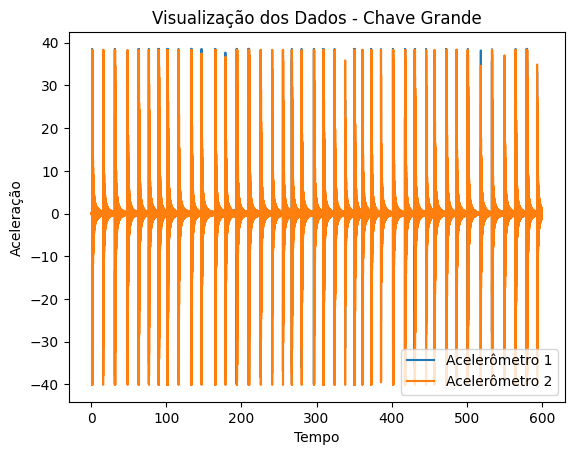

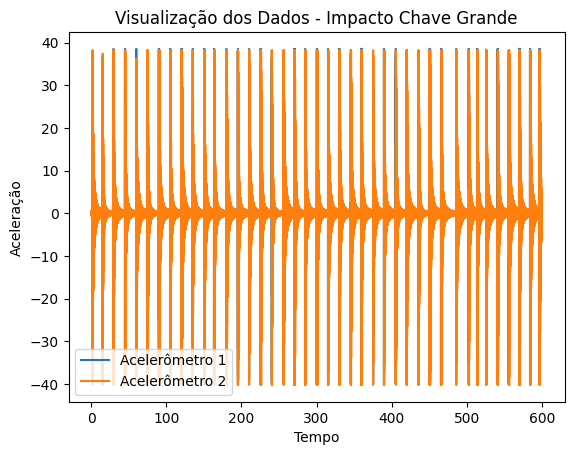

In [8]:
# Visualização dos Dados
plt.plot(dadosChaveGrande.time.values, dadosChaveGrande.imu1accz.values - dadosChaveGrande.imu1accz.mean(), label="Acelerômetro 1")
plt.plot(dadosChaveGrande.time.values, dadosChaveGrande.imu2accz.values - dadosChaveGrande.imu2accz.mean(), label="Acelerômetro 2")
plt.legend()
plt.title("Visualização dos Dados - Chave Grande")
plt.xlabel("Tempo")
plt.ylabel("Aceleração")
plt.show()

plt.plot(dadosImpactoChaveGrande.time.values, dadosImpactoChaveGrande.imu1accz.values - dadosImpactoChaveGrande.imu1accz.mean(), label="Acelerômetro 1")
plt.plot(dadosImpactoChaveGrande.time.values, dadosImpactoChaveGrande.imu2accz.values - dadosImpactoChaveGrande.imu2accz.mean(), label="Acelerômetro 2")
plt.legend()
plt.title("Visualização dos Dados - Impacto Chave Grande")
plt.xlabel("Tempo")
plt.ylabel("Aceleração")
plt.show()


# ---------------------------
# Processamento de Dados 
# ---------------------------

In [9]:
acc1d = dadosImpactoChaveGrande.imu1accz.values - dadosImpactoChaveGrande.imu1accz.mean()  # Acelerômetro 1
acc2d1 = dadosImpactoChaveGrande.imu2accz.values - dadosImpactoChaveGrande.imu2accz.mean()  # Acelerômetro 2
time11 = dadosImpactoChaveGrande.time.values
display(dadosImpactoChaveGrande.getLogs())

TSampl1 = dadosImpactoChaveGrande.time.values[1] - dadosImpactoChaveGrande.time.values[0]
display(1 / TSampl1)

# Outros cálculos semelhantes para diferentes conjuntos de dados...

[[0.0, 'Started'],
 [0.004808, 'IMU1|LSM6DS3|0x6B|I2C-1|±4g (±39,2m/s²)|±125º/s|Auto'],
 [0.009616, 'IMU2|LSM6DS3|0x6B|I2C-2|±4g (±39,2m/s²)|±125º/s|Auto'],
 [0.014424, 'IMU3|Disabled'],
 [0.019232, 'ADC|ADS1015|0|0|0|0|±0.256 V|1600 SPS'],
 [0.02404, 'Gen1|Disabled'],
 [0.028848, 'Gen2|Disabled'],
 [0.033656, 'Gen3|Disabled'],
 [0.038464, 'Gen4|Disabled'],
 [0.043272, 'Ctrl|Disabled'],
 [599.00468, 'Stopped']]

207.9866888519135

In [10]:
acc2d = dadosChaveGrande.imu1accz.values - dadosChaveGrande.imu1accz.mean()  # Acelerômetro 1
acc2d2 = dadosChaveGrande.imu2accz.values - dadosChaveGrande.imu2accz.mean()  # Acelerômetro 2
time1 = dadosChaveGrande.time.values
display(dadosChaveGrande.getLogs())

Tsampl2 = dadosChaveGrande.time.values[1] - dadosChaveGrande.time.values[0]
display(1 / Tsampl2)


[[0.0, 'Started'],
 [0.004808, 'IMU1|LSM6DS3|0x6B|I2C-1|±4g (±39,2m/s²)|±125º/s|Auto'],
 [0.009616, 'IMU2|LSM6DS3|0x6B|I2C-2|±4g (±39,2m/s²)|±125º/s|Auto'],
 [0.014424, 'IMU3|Disabled'],
 [0.019232, 'ADC|ADS1015|0|0|0|0|±0.256 V|1600 SPS'],
 [0.02404, 'Gen1|Disabled'],
 [0.028848, 'Gen2|Disabled'],
 [0.033656, 'Gen3|Disabled'],
 [0.038464, 'Gen4|Disabled'],
 [0.043272, 'Ctrl|Disabled'],
 [599.00468, 'Stopped']]

207.9866888519135

# ------------------------
# Visualização dos Dados
# ------------------------

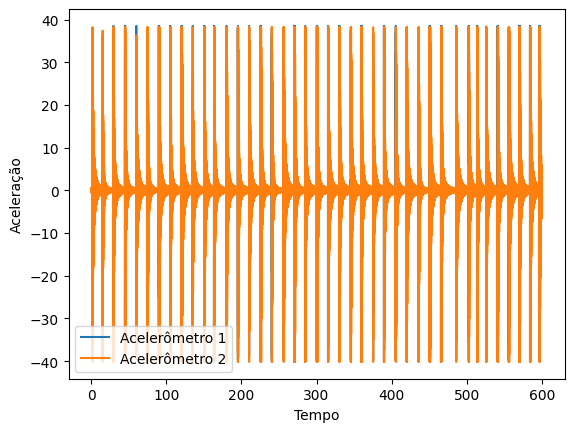

In [19]:
plt.plot(time11, acc1d, label="Acelerômetro 1")
plt.plot(time11, acc2d1, label="Acelerômetro 2")
plt.legend()
plt.xlabel("Tempo")
plt.ylabel("Aceleração")
plt.show()

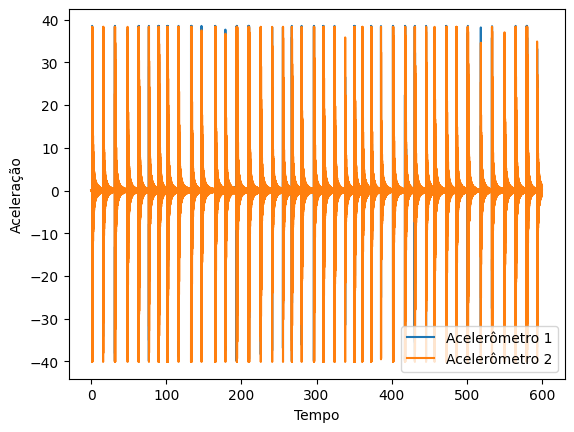

In [11]:
plt.plot(time1, acc2d, label="Acelerômetro 1")
plt.plot(time1, acc2d2, label="Acelerômetro 2")
plt.legend()
plt.xlabel("Tempo")
plt.ylabel("Aceleração")
plt.show()

# ------------------------
# Análise de Picos
# ------------------------

(array([   401,   3193,   6183,   9376,  12504,  15605,  18771,  21907,
        25064,  28151,  31312,  34018,  37490,  40658,  43731,  46918,
        50044,  53292,  56334,  59257,  62547,  65572,  68701,  71914,
        74785,  78063,  81057,  84335,  87342,  90648,  93725,  96831,
       101039, 104545, 106815, 109344, 112575, 115608, 118593, 121494,
       124140], dtype=int64), {'peak_heights': array([36.6858563 , 35.2445469 , 38.54136259, 38.54136259, 38.54136259,
       34.93449779, 38.54136259, 38.54136259, 38.54136259, 38.54136259,
       38.54136259, 38.54136259, 38.54136259, 38.54136259, 38.54136259,
       38.54136259, 38.09005558, 31.3491808 , 38.54136259, 38.54136259,
       38.54136259, 38.54136259, 38.54136259, 37.51784138, 38.54136259,
       30.92899841, 38.54136259, 38.54136259, 37.56572541, 36.16511744,
       38.54136259, 38.54136259, 38.54136259, 38.52460318, 38.54136259,
       38.38693658, 38.54136259, 37.8326789 , 38.54136259, 38.54136259,
       38.54136259])}

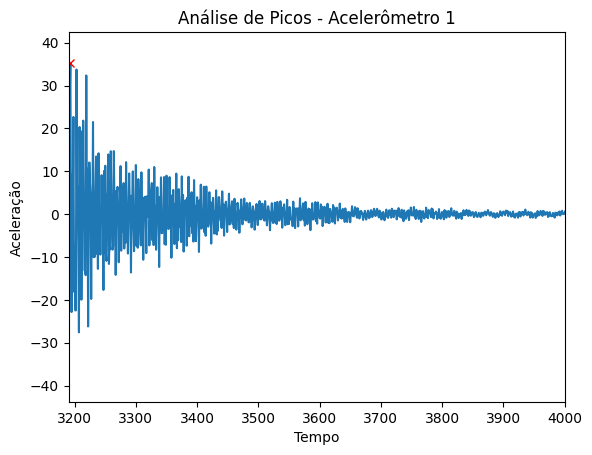

In [12]:
aux1 = signal.find_peaks(acc1d, height=2, distance=1300)  # Encontrar picos
print(aux1)
plt.plot(acc1d)
plt.plot(aux1[0], aux1[1]['peak_heights'], 'xr')
plt.xlim(3190, 4000)
plt.title("Análise de Picos - Acelerômetro 1")
plt.xlabel("Tempo")
plt.ylabel("Aceleração")
plt.show()

(array([   399,   1709,   3202,   6206,   9434,  12543,  13868,  15628,
        18769,  20089,  21925,  25138,  26469,  28144,  31294,  32625,
        34013,  37519,  40626,  43755,  45057,  46976,  50066,  53350,
        54652,  56331,  59285,  62508,  65642,  66943,  68759,  71947,
        74804,  78061,  81120,  84368,  87400,  88728,  90640,  93752,
        95053,  96891, 101058, 102366, 104548, 106919, 109377, 110703,
       112603, 115636, 116936, 118641, 121532, 124122], dtype=int64), {'peak_heights': array([38.23848353,  2.25482968, 37.43044047, 38.23848353, 38.23848353,
       36.32791061,  2.10040367, 38.23848353, 38.23848353,  2.10399498,
       38.23848353, 38.23848353,  2.23088766, 38.23848353, 38.23848353,
        2.01062111, 38.23848353, 38.23848353, 38.23848353, 38.23848353,
        2.10399498, 38.23848353, 38.23848353, 38.23848353,  2.81267867,
       38.23848353, 38.23848353, 38.23848353, 38.23848353,  2.15187901,
       38.23848353, 38.23848353, 38.23848353, 38.23848

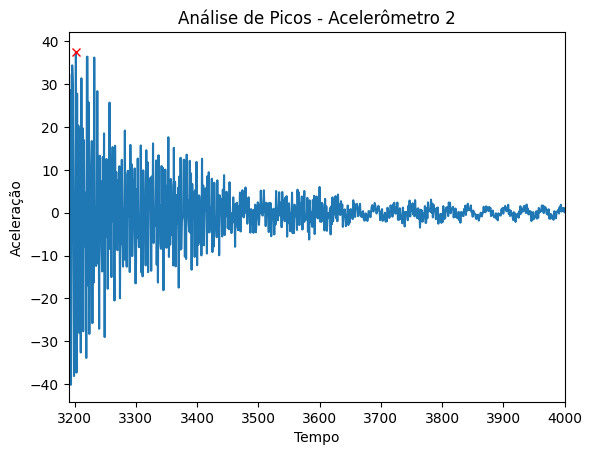

In [13]:
aux2 = signal.find_peaks(acc2d1, height=2, distance=1300)  # Encontrar picos
print(aux2)
plt.plot(acc2d1)
plt.plot(aux2[0], aux2[1]['peak_heights'], 'xr')
plt.xlim(3190, 4000)
plt.title("Análise de Picos - Acelerômetro 2")
plt.xlabel("Tempo")
plt.ylabel("Aceleração")
plt.show()


# ---------------------------------------
# Criação de Amostras e Rótulos
# ---------------------------------------

In [14]:
TamJanela = int(3.6 * 208)

def criar_amostras_e_rotulos(dados, nome_arquivo):
    acc1 = dados.imu1accz.values - dados.imu1accz.mean()
    picos, _ = signal.find_peaks(acc1, height=3, distance=1500)  
    amostras = []
    rotulos = []

    for i in range(len(picos) - 1):
        inicio = picos[i]
        fim = picos[i] + TamJanela
        amostra = acc1[inicio:fim]
        amostra = amostra - amostra.mean() 
        amostra = amostra / amostra.max()
        amostras.append(amostra)
        rotulos.append(nome_arquivo) #coluna de classificação em DEDO ou METAL

    return amostras, rotulos

# Chamadas para criar amostras e rótulos para diferentes conjuntos de dados...

In [15]:
amostras_chave_grande, rotulos_chave_grande = criar_amostras_e_rotulos(dadosChaveGrande, "ChaveGrande.feather")
amostras_chave_media, rotulos_chave_media = criar_amostras_e_rotulos(dadosChaveMedia, "ChaveMedia.feather")
amostras_chave_pequena, rotulos_chave_pequena = criar_amostras_e_rotulos(dadosChavePequena, "ChavePequena.feather")
amostras_impacto_chave_pequena, rotulos_impacto_chave_pequena = criar_amostras_e_rotulos(dadosImpactoChavePequena, "Impacto_Chave_Pequena-9.feather")
amostras_impacto_chave_media, rotulos_impacto_chave_media = criar_amostras_e_rotulos(dadosImpactoChaveMedia, "Impacto_Chave_Media-13.feather")
amostras_impacto_chave_grande, rotulos_impacto_chave_grande = criar_amostras_e_rotulos(dadosImpactoChaveGrande, "Impacto_Chave_Grande-22.feather")

# ------------------------
# Treinamento do Modelo
# ------------------------

In [16]:
X_multiclass = np.vstack(amostras_chave_grande + amostras_chave_media + amostras_chave_pequena)

y_multiclass = np.array(rotulos_chave_grande + rotulos_chave_media + rotulos_chave_pequena)

# Divisão dos dados em treino e teste
X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass = train_test_split(X_multiclass, y_multiclass, test_size=0.2)

# Criação e treinamento do modelo
model_multiclass = RandomForestClassifier(n_estimators=200)
model_multiclass.fit(X_train_multiclass, y_train_multiclass)

RandomForestClassifier(n_estimators=200)

In [17]:
x2_multiclass = np.vstack(amostras_impacto_chave_pequena + amostras_impacto_chave_media + amostras_impacto_chave_grande)

y2_multiclass = np.array(rotulos_impacto_chave_pequena + rotulos_impacto_chave_media + rotulos_impacto_chave_grande)

# Divisão dos dados em treino e teste
X_train2_multiclass, X_test2_multiclass, y_train2_multiclass, y_test2_multiclass = train_test_split(x2_multiclass, y2_multiclass, test_size=0.2)

#criação e treinamento do modelo
model2_multiclass = RandomForestClassifier(n_estimators=200)
model2_multiclass.fit(X_train2_multiclass, y_train2_multiclass)

RandomForestClassifier(n_estimators=200)

In [21]:
x3_multiclass = np.vstack(amostras_chave_grande + amostras_chave_media + amostras_chave_pequena + amostras_impacto_chave_pequena + amostras_impacto_chave_media + amostras_impacto_chave_grande)

y3_multiclass = np.array(rotulos_chave_grande + rotulos_chave_media + rotulos_chave_pequena + rotulos_impacto_chave_pequena + rotulos_impacto_chave_media + rotulos_impacto_chave_grande)

# Divisão dos dados em treino e teste
X_train3_multiclass, X_test3_multiclass, y_train3_multiclass, y_test3_multiclass = train_test_split(x3_multiclass, y3_multiclass, test_size=0.2)

#criação e treinamento do modelo
model3_multiclass = RandomForestClassifier(n_estimators=200)
model3_multiclass.fit(X_train3_multiclass, y_train3_multiclass)


RandomForestClassifier(n_estimators=200)

# ------------------------
# Avaliação do Modelo
# ------------------------

In [19]:
#DADOS JOÃO

# Previsões
y_pred_multiclass = model_multiclass.predict(X_test_multiclass)

# Acurácia
accuracy_multiclass = accuracy_score(y_test_multiclass, y_pred_multiclass)
print(f'Acurácia do modelo multiclasse: {accuracy_multiclass:.2f}')
print()

# Relatório de Classificação
print(classification_report(y_test_multiclass, y_pred_multiclass))

# Matriz de Confusão
confusion_matrix_multiclass = confusion_matrix(y_true=y_test_multiclass, y_pred=y_pred_multiclass)
print("Matriz de Confusão:")
print(confusion_matrix_multiclass)

Acurácia do modelo multiclasse: 0.60

                      precision    recall  f1-score   support

 ChaveGrande.feather       0.57      0.50      0.53         8
  ChaveMedia.feather       0.44      0.50      0.47         8
ChavePequena.feather       0.78      0.78      0.78         9

            accuracy                           0.60        25
           macro avg       0.60      0.59      0.59        25
        weighted avg       0.61      0.60      0.60        25

Matriz de Confusão:
[[4 3 1]
 [3 4 1]
 [0 2 7]]


In [20]:
#DADOS GABRIEL

# Previsões 
y_pred2_multiclass = model2_multiclass.predict(X_test2_multiclass)

# Acurácia
accuracy2_multiclass = accuracy_score(y_test2_multiclass, y_pred2_multiclass)
print(f'Acurácia do modelo multiclasse: {accuracy2_multiclass:.2f}')
print()

# Relatório de Classificação
print(classification_report(y_test2_multiclass, y_pred2_multiclass))

# Matriz de Confusão
confusion_matrix2_multiclass = confusion_matrix(y_true=y_test2_multiclass, y_pred=y_pred2_multiclass)
print("Matriz de Confusão:")
print(confusion_matrix2_multiclass)

Acurácia do modelo multiclasse: 0.42

                                 precision    recall  f1-score   support

Impacto_Chave_Grande-22.feather       0.22      0.50      0.31         4
 Impacto_Chave_Media-13.feather       0.38      0.27      0.32        11
Impacto_Chave_Pequena-9.feather       0.71      0.56      0.63         9

                       accuracy                           0.42        24
                      macro avg       0.44      0.44      0.42        24
                   weighted avg       0.48      0.42      0.43        24

Matriz de Confusão:
[[2 1 1]
 [7 3 1]
 [0 4 5]]


In [22]:
#DADOS JOÃO E GABRIEL

#Previsões 
y_pred3_multiclass = model3_multiclass.predict(X_test3_multiclass)

# Acurácia
accuracy3_multiclass = accuracy_score(y_test3_multiclass, y_pred3_multiclass)
print(f'Acurácia do modelo multiclasse: {accuracy3_multiclass:.2f}')
print()

# Relatório de Classificação
print(classification_report(y_test3_multiclass, y_pred3_multiclass))

# Matriz de Confusão
confusion_matrix3_multiclass = confusion_matrix(y_true=y_test3_multiclass, y_pred=y_pred3_multiclass)
print("Matriz de Confusão:")
print(confusion_matrix3_multiclass)


Acurácia do modelo multiclasse: 0.51

                                 precision    recall  f1-score   support

            ChaveGrande.feather       0.75      0.75      0.75         8
             ChaveMedia.feather       0.38      0.60      0.46         5
           ChavePequena.feather       0.33      0.40      0.36         5
Impacto_Chave_Grande-22.feather       0.67      0.55      0.60        11
 Impacto_Chave_Media-13.feather       0.31      0.44      0.36         9
Impacto_Chave_Pequena-9.feather       0.80      0.36      0.50        11

                       accuracy                           0.51        49
                      macro avg       0.54      0.52      0.51        49
                   weighted avg       0.58      0.51      0.52        49

Matriz de Confusão:
[[6 0 0 2 0 0]
 [2 3 0 0 0 0]
 [0 1 2 0 2 0]
 [0 0 0 6 5 0]
 [0 3 0 1 4 1]
 [0 1 4 0 2 4]]
